In [12]:
import pandas as pd
import numpy as np

## 1. Lineárna regresia

In [13]:
pr = pd.DataFrame({
    'poc_rokov': [4, 7, 9, 12, 3, 5, 11, 21, 1, 14],
    'prijem': [32, 54, 64, 70, 36, 41, 59, 90, 20, 79]
})

pr.head()

,poc_rokov,prijem
0,4,32
1,7,54
2,9,64
3,12,70
4,3,36


In [17]:
from sklearn.linear_model import LinearRegression

X = pr[['poc_rokov']]
y = pr[['prijem']]


model = LinearRegression().fit(X, y)

pr['predicted'] = model.predict(X)

model.score(X, y)
print(pr)

   poc_rokov  prijem  predicted
0          4      32  37.802821
1          7      54  48.460595
2          9      64  55.565777
3         12      70  66.223551
4          3      36  34.250230
5          5      41  41.355412
6         11      59  62.670960
7         21      90  98.196872
8          1      20  27.145048
9         14      79  73.328734


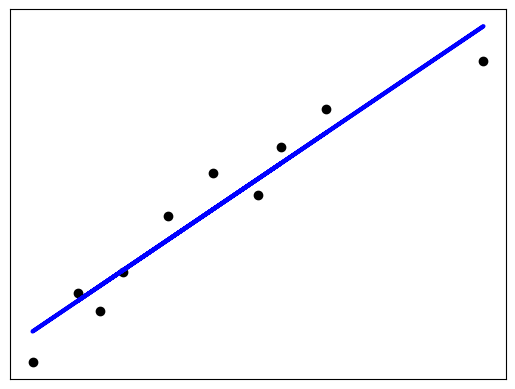

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color="black")
plt.plot(X, pr['predicted'], color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [19]:
pr1 = pd.DataFrame({
    'poc_rokov': [10,15,20]
})

In [21]:
pr1['prijem'] = model.predict(pr1[['poc_rokov']])

print(pr1)

   poc_rokov     prijem
0         10  59.118369
1         15  76.881325
2         20  94.644281


## 2. Viacnásobná regresia

In [23]:
state = pd.read_csv('data/state.csv')
state.head()

,Unnamed: 0,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361


In [28]:
from sklearn.model_selection import train_test_split

state_train, state_test = train_test_split(state, test_size=0.2, random_state=42)


In [33]:
X_train = state_train[['Illiteracy', 'Life.Exp']]
y_train = state_train['Murder']

X_test = state_test[['Illiteracy', 'Life.Exp']]
y_test = state_test['Murder']

model2 = LinearRegression()
model2.fit(X_train, y_train)

state_test['Murder_predict'] = model2.predict(X_test)

state_test.head()

,Unnamed: 0,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,Murder_predict
13,Indiana,5313,4458,0.7,70.88,7.1,52.9,122,36097,6.326181
39,South Carolina,2816,3635,2.3,67.96,11.6,37.8,65,30225,15.270770
30,New Mexico,1144,3601,2.2,70.32,9.7,55.2,120,121412,11.181938
45,Virginia,4981,4701,1.4,70.08,9.5,47.8,85,39780,9.465397
17,Louisiana,3806,3545,2.8,68.76,13.2,42.2,12,44930,15.289938


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model2.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 1.2146152166819042
Mean Squared Error (MSE): 2.483737507947299
Root Mean Squared Error (RMSE): 1.5759877880070323


## 3. Rozhodovací strom (dáta CO2)

In [101]:
C02 = pd.read_csv('data/CO2.csv')
C02.head()

,Unnamed: 0,Plant,Type,Treatment,conc,uptake
0,1,Qn1,Quebec,nonchilled,95,16.0
1,2,Qn1,Quebec,nonchilled,175,30.4
2,3,Qn1,Quebec,nonchilled,250,34.8
3,4,Qn1,Quebec,nonchilled,350,37.2
4,5,Qn1,Quebec,nonchilled,500,35.3


In [102]:
C02.shape

(84, 6)

In [103]:
C02 = C02.drop("Plant", axis='columns')
C02.head

<bound method NDFrame.head of     Unnamed: 0         Type   Treatment  conc  uptake
0            1       Quebec  nonchilled    95    16.0
1            2       Quebec  nonchilled   175    30.4
2            3       Quebec  nonchilled   250    34.8
3            4       Quebec  nonchilled   350    37.2
4            5       Quebec  nonchilled   500    35.3
..         ...          ...         ...   ...     ...
79          80  Mississippi     chilled   250    17.9
80          81  Mississippi     chilled   350    17.9
81          82  Mississippi     chilled   500    17.9
82          83  Mississippi     chilled   675    18.9
83          84  Mississippi     chilled  1000    19.9

[84 rows x 5 columns]>

In [104]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = C02.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_columns:
    C02[col] = le.fit_transform(C02[col])

In [105]:
train_data, test_data = train_test_split(C02, train_size=0.7, random_state=42)
train_data.shape

(58, 5)

In [106]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

X_train = train_data.drop('Treatment', axis=1)
y_train = train_data['Treatment']

X_test = test_data.drop('Treatment', axis=1)
y_test = test_data['Treatment']

co2_tree = DecisionTreeClassifier(random_state=42)
co2_tree.fit(X_train, y_train)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (26, 4)
y_test shape: (26,)


|--- Unnamed: 0 <= 63.50
|   |--- Unnamed: 0 <= 43.00
|   |   |--- Unnamed: 0 <= 21.50
|   |   |   |--- class: 1
|   |   |--- Unnamed: 0 >  21.50
|   |   |   |--- class: 0
|   |--- Unnamed: 0 >  43.00
|   |   |--- class: 1
|--- Unnamed: 0 >  63.50
|   |--- class: 0



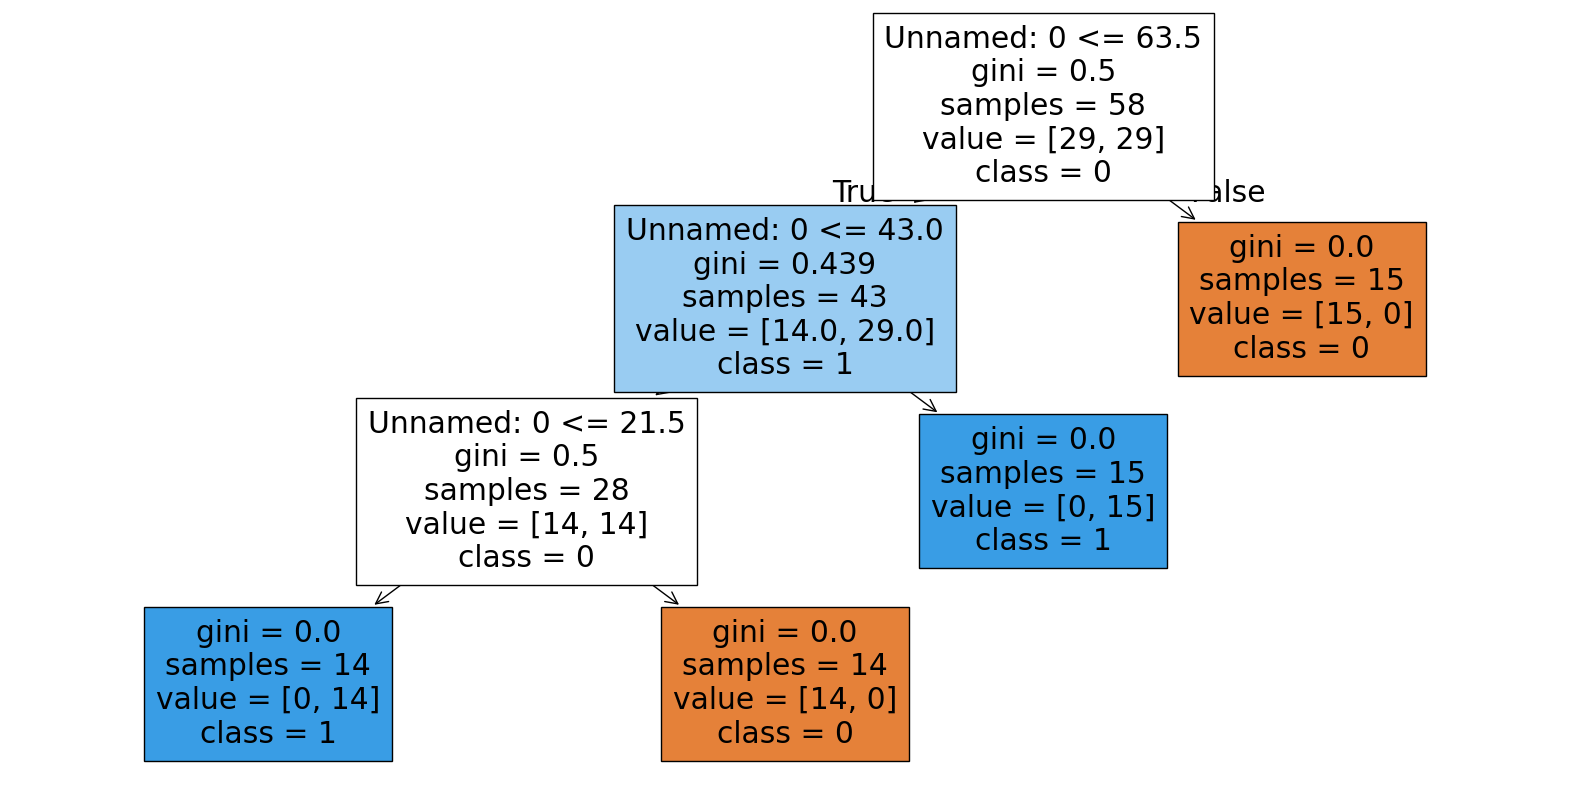

In [107]:
tree_text = export_text(co2_tree, feature_names=list(X_train.columns.astype(str)))  # Convert feature names to strings
print(tree_text)

plt.figure(figsize=(20, 10))
plot_tree(co2_tree, feature_names=list(X_train.columns.astype(str)), class_names=[str(cls) for cls in co2_tree.classes_], filled=True)
plt.show()

In [108]:
testPred_tree = co2_tree.predict(X_test)
print(testPred_tree)
testPred_tree.size

[0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0]


26

In [109]:
from sklearn.metrics import confusion_matrix, classification_report

tbl = confusion_matrix(testPred_tree, y_test)
print("Confusion Matrix:")
print(tbl)

report = classification_report(testPred_tree, y_test, target_names=['0', '1'])
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[13  1]
 [ 0 12]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.92      1.00      0.96        12

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



## 4. Naivný Bayesovský klasifikátor (dáta CO2)